# 執行前置作業 (ipywidgets, Google Drive, git clone)

安裝外部套件模組

In [1]:
#安裝輸入輸出小工具模組
!pip install ipywidgets
#https://ipywidgets.readthedocs.io/en/latest/index.html
# import ipywidgets as widgets #導入元件
# from IPython.display import display #顯示元件

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


使用自設套件模組

In [2]:
#連接Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#回到雲端硬碟
%cd /content
#從git下載資料夾
!git clone https://github.com/RogerRJSiao/rsiao_bioTest.git

import os
import shutil

#轉移自製systemFiles.py檔案
py_file = 'systemFiles.py' #執行檔
src = "/content/rsiao_bioTest/rsiao_func/" + py_file
filename = "rsiao_" + py_file #命名區隔檔名rsiao_
dest1 = "/content/rsiao_bioTest/rsiao_func/" + filename
dest2 = "/content/drive/MyDrive/Colab Notebooks/" + filename
shutil.copy(src, dest1) #複製
shutil.move(dest1, dest2) #轉移
print(f"完成檔案移轉，新檔名：{filename}")

!python "/content/drive/MyDrive/Colab Notebooks/rsiao_systemFiles.py"

%cd /content/drive/MyDrive/Colab Notebooks
from rsiao_systemFiles import *

mk_folders_in_Colab() #建立存取資料夾

%cd '/content/rsiao_bioTest/rsiao_func'
detect_pyFiles() #計算當前dir內py檔案數量
cp_files_to_Colab() #轉移複製檔案

/content
Cloning into 'rsiao_bioTest'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 185 (delta 62), reused 160 (delta 45), pack-reused 0
Receiving objects: 100% (185/185), 56.34 KiB | 11.27 MiB/s, done.
Resolving deltas: 100% (62/62), done.
完成檔案移轉，新檔名：rsiao_systemFiles.py
/content/drive/MyDrive/Colab Notebooks
成功！rsiao_rawData 已建立。
成功！rsiao_resultData 已建立。
/content/rsiao_bioTest/rsiao_func
目前偵測到 4 個 py 檔案
目前偵測到 4 個 py 檔案
完成第 1 個檔案移轉，新檔名：rsiao_getSeqType.py
完成第 2 個檔案移轉，新檔名：rsiao_getDateTime.py
完成第 3 個檔案移轉，新檔名：rsiao_systemFiles.py
完成第 4 個檔案移轉，新檔名：rsiao_dna2protein.py


# 上傳DNA定序檔案 (upload .txt, import and execute .py)

讀取資料 & 選擇類別

In [4]:
#回到執行環境
%cd /content/drive/MyDrive/Colab Notebooks
!python "/content/drive/MyDrive/Colab Notebooks/rsiao_getSeqType.py"
from rsiao_getSeqType import *

#存取外部上傳txt檔案
%cd /content/drive/MyDrive/Colab Notebooks/rsiao_rawData
print('\r\n請上傳 1 份 txt 檔 (內含 DNA 序列)\r\n')
print('(也可從 /content/rsiao_bioTest/rsiao_rawData 內下載現成的 txt 範例)\r\n')
#修整序列內容(去除空格、去除換行)
file_name, file_content = upload_txt_file()

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/rsiao_rawData

請上傳 1 份 txt 檔 (內含 DNA 序列)

(也可從 /content/rsiao_bioTest/rsiao_rawData 內下載現成的 txt 範例)



Saving ATGC_eg1.txt to ATGC_eg1.txt


In [5]:
#顯示下拉選單：物種類別、序列種類
species_type, sequence_type = '', ''
showDropdown1()


請先選擇物種類別、序列種類



Dropdown(description='物種類別 ', options=(('請選擇', 0), ('動物 (推薦)', 10), ('病毒', 50)), value=0)

Dropdown(description='序列種類', options=(('請選擇', 0), ('DNA (推薦)', 20), ('mRNA', 30), ('Proteins', 40)), value=0)

Button(button_style='success', description='確 認', style=ButtonStyle())

Output()

您目前點選 動物 和 DNA 。
成功選取 動物 (代號：10) 和 DNA (代號：20)！



In [6]:
assert False #中斷點
#== 繼續向下執行前，請務必先選好 Dropdown ==#
#== 物種類別(dd1.value)、序列種類(dd2.value) ==#

AssertionError: ignored

初步檢查序列形式

In [7]:
#回到執行環境
%cd /content/drive/MyDrive/Colab Notebooks
!python "/content/drive/MyDrive/Colab Notebooks/rsiao_getSeqType.py"
!python "/content/drive/MyDrive/Colab Notebooks/rsiao_dna2protein.py"
from rsiao_getSeqType import *
from rsiao_dna2protein import *

#顯示txt內未整理序列
showTextarea1(file_content)
#顯示txt內整理後序列
speCode, seqCode = dd1.value, dd2.value
str_seq, file_showMsg = check_seqType(speCode, seqCode, file_content) #TODO
showTextarea1(str_seq)
print(file_showMsg)

/content/drive/MyDrive/Colab Notebooks

請確認檔案上傳的序列



Textarea(value='GGG ACA ATG CAT GCC ATG CGC GCT CTG CAG\r\nCAG GGA GGA CGT GGC TGG GCT CGT GAA GCA \r\nTGT GGG…


這段序列應該是 DNA

請確認檔案上傳的序列



Textarea(value='GGGACAATGCATGCCATGCGCGCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGGGTGAGTAGCCCAGGGGCCCTAACCCG…


這段序列應該是 DNA


In [8]:
#回到執行環境
arr_dna_success, arr_cdna_success, arr_mrna_success, arr_protein_success = transcript_translate(str_seq)

DNA 修整後(成功，序列第 6 位)：  atgcatgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga
DNA 修整後(成功，序列第 10 位)：  atgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtgagtag
DNA 修整後(成功，序列第 15 位)：  atgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga
DNA 修整後(失敗，序列第 59 位)：  atgtggggggtgagtagcccaggggccctaacccgggttaacg
reviewDNA success: [['atgcatgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga', 66, 'DNA'], ['atgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtgagtag', 66, 'DNA'], ['atgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga', 57, 'DNA']]
reviewDNA error: [['atgtggggggtgagtagcccaggggccctaacccgggttaacg', 43, 'DNA']]
reviewDNA start_pos: [6, 10, 15]
DNA2mRNA success: [['augcaugccaugcgcgcucugcagcagggaggacguggcugggcucgugaagcaugugggggguga', 66, 'mRNA'], ['augccaugcgcgcucugcagcagggaggacguggcugggcucgugaagcauguggggggugaguag', 66, 'mRNA'], ['augcgcgcucugcagcagggaggacguggcugggcucgugaagcaugugggggguga', 57, 'mRNA']]
DNA2mRNA error: []
mRNA2cDNA success: [[

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#繪製統計分析圖表 (NumPy, Pandas, Matplotlib)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# arr_dna_success = [
#   ['atgcatgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga', 66, 'DNA'],
#   ['atgccatgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtgagtag', 66, 'DNA'],
#   ['atgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcatgtggggggtga', 57, 'DNA']
# ]
# arr_cdna_success = [
#   ['tcaccccccacatgcttcacgagcccagccacgtcctccctgctgcagagcgcgcatggcatgcat', 66, 'cDNA'],
#   ['ctactcaccccccacatgcttcacgagcccagccacgtcctccctgctgcagagcgcgcatggcat', 66, 'cDNA'],
#   ['tcaccccccacatgcttcacgagcccagccacgtcctccctgctgcagagcgcgcat', 57, 'cDNA']
# ]
# arr_mrna_success = [
#   ['augcaugccaugcgcgcucugcagcagggaggacguggcugggcucgugaagcaugugggggguga', 66, 'mRNA'],
#   ['augccaugcgcgcucugcagcagggaggacguggcugggcucgugaagcauguggggggugaguag', 66, 'mRNA'],
#   ['augcgcgcucugcagcagggaggacguggcugggcucgugaagcaugugggggguga', 57, 'mRNA']
# ]
# arr_protein_success = [
#   ['MHAMRALQQGGRGWAREACGG_', 21, 'protein'],
#   ['MPCALCSREDVAGLVKHVGGE_', 21, 'protein'],
#   ['MRALQQGGRGWAREACGG_', 18, 'protein']
# ]

In [10]:
#使用list建立DataFrame
df_DNA = pd.DataFrame(arr_dna_success, columns=['DNA_seq', 'DNA_nt', 'type'])
df1 = df_DNA.iloc[:, 0:2]
df_mRNA = pd.DataFrame(arr_dna_success, columns=['mRNA_seq', 'mRNA_nt', 'type'])
df2 = df_mRNA.iloc[:, 0:2]
df_protein = pd.DataFrame(arr_protein_success, columns=['protein_seq', 'protein_aa', 'type'])
df3 = df_protein.iloc[:, 0:2]

資料整理 - 使用 list、dict 儲存分類資料

In [11]:
#計算核甘酸種類數量 list
def count_nt(arr_seq_success):
  arr_cnt = []
  for arr_seq in arr_seq_success:
    arr_atcg = [0,0,0,0,0]
    arr_unit = list(arr_seq[0].lower())
    for unit in arr_unit:
      match unit:
        case 'a':
          arr_atcg[0]+=1
        case 't':
          arr_atcg[1]+=1
        case 'u':
          arr_atcg[1]+=1
        case 'c':
          arr_atcg[2]+=1
        case 'g':
          arr_atcg[3]+=1
        case _:
          arr_atcg[4]+=1
    arr_cnt.append(arr_atcg)

  return arr_cnt

#計算胺基酸種類數量 dict
def count_aa(arr_seq_success):
  arr_cnt = []
  for arr_protein in arr_seq_success:
    dic_aa = {}
    arr_aa = list(arr_protein[0].upper())
    for unit in arr_aa:
      if unit in dic_aa:
        dic_aa[unit] += 1
      else:
        dic_aa[unit] = 1
    arr_cnt.append([dic_aa])
  return arr_cnt

#計算必需胺基酸
def count_eaa(arr_seq_success):
  humanEAA = ['H','I','L','K','M','F','T','W','V',]
  arr_cnt = []
  arr_ratio = []
  for arr_protein in arr_seq_success:
    arr_aa = list(arr_protein[0].upper())
    cnt = len([aa for aa in arr_aa if aa in humanEAA])
    ratio = len(arr_aa)
    arr_cnt.append(cnt)
    arr_ratio.append("{:.1%}".format(cnt/ratio))

  return arr_cnt, arr_ratio

資料合併、篩選排序

In [12]:
#計算核甘酸、胺基酸種類數量
df_cntDNA = pd.DataFrame(count_nt(arr_dna_success), columns=['nt_a', 'nt_t', 'nt_c', 'nt_g', 'nt_NaN'])
df1_1 = df_cntDNA.iloc[:,:]
df_cntProtein = pd.DataFrame(count_aa(arr_protein_success), columns=['aa_type'])
df3_1 = df_cntProtein.iloc[:,:]
#計算必需胺基酸
EAAcnt, EAAratio = count_eaa(arr_protein_success)

#合併欄位
new_df = pd.concat([df1, df1_1, df3, df3_1], axis=1)
new_df['EAA'] = EAAcnt
new_df['EAA_ratio'] = EAAratio
new_df['seq_id'] = [f'seq_{i+1}' for i in range(len(df_DNA))]
new_df

,DNA_seq,DNA_nt,nt_a,nt_t,nt_c,nt_g,nt_NaN,protein_seq,protein_aa,aa_type,EAA,EAA_ratio,seq_id
0,atgcatgccatgcgcgctctgcagcagggaggacgtggctgggctc...,66,11,12,14,29,0,MHAMRALQQGGRGWAREACGG_,21,"{'M': 2, 'H': 1, 'A': 4, 'R': 3, 'L': 1, 'Q': ...",5,22.7%,seq_1
1,atgccatgcgcgctctgcagcagggaggacgtggctgggctcgtga...,66,11,12,13,30,0,MPCALCSREDVAGLVKHVGGE_,21,"{'M': 1, 'P': 1, 'C': 2, 'A': 2, 'L': 2, 'S': ...",8,36.4%,seq_2
2,atgcgcgctctgcagcagggaggacgtggctgggctcgtgaagcat...,57,9,10,11,27,0,MRALQQGGRGWAREACGG_,18,"{'M': 1, 'R': 3, 'A': 3, 'L': 1, 'Q': 2, 'G': ...",3,15.8%,seq_3


In [13]:
#設定篩選條件、排序方式
new_df_sort = new_df[new_df['DNA_nt']>10].iloc[:,[1, 2, 3, 4, 5, 10, 11, 12]].sort_values(by=['EAA_ratio', 'DNA_nt'], ascending=[False, True])
df_pie = new_df_sort[:3][['seq_id', 'nt_a','nt_t','nt_c','nt_g']]  #至多3列
df_pie

,seq_id,nt_a,nt_t,nt_c,nt_g
1,seq_2,11,12,13,30
0,seq_1,11,12,14,29
2,seq_3,9,10,11,27


繪製圓餅圖

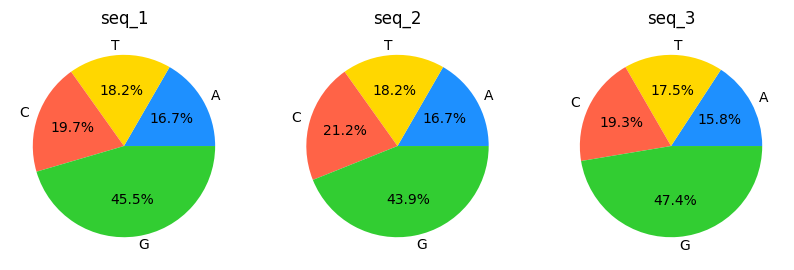

In [14]:
#取得數值
data = []
for i in range(len(df_pie)):
  row = np.array(df_pie.iloc[i,:][['nt_a','nt_t','nt_c','nt_g']])
  data.append(row)

data
#取得標題
title = df_pie['seq_id']
pie_labels = ['A', 'T', 'C', 'G']
pie_colors = ['dodgerblue', 'gold', 'tomato', 'limegreen']

if len(data) > 1:
  #設定多圖
  fig, ax = plt.subplots(nrows=1, ncols=len(data), figsize=(10, 5))
  #加上數值、參數
  for i in range(len(data)):
    ax[i].pie(data[i], labels=pie_labels, autopct='%0.1f%%', colors=pie_colors)
    ax[i].set_title(title[i])
else:
  x = data[0]
  plt.pie(x, radius=0.8, labels=pie_labels, autopct='%0.1f%%', colors=pie_colors)
  #plt.title(title[title.index])

#繪圖
plt.show()

# 使用生物序列資料庫 (NCBI blastn, FASTA download)

安裝 biopython

In [15]:
#使用NCBI資料庫
try:
  !pip install biopython
except ImportError:
  pass
#導入Bio
import Bio
try:
  from Bio.Blast import NCBIWWW
  from Bio.Blast import NCBIXML
except ImportError:
  pass
# help(NCBIWWW.qblast)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00


In [16]:
#定義blastn序列
blastn_seq = str_seq if len(arr_dna_success) == 0 else arr_dna_success[0]
#執行blastn序列比對
result_handle = NCBIWWW.qblast("blastn", "nt", blastn_seq)
#解譯XML
blast_records = NCBIXML.parse(result_handle)
blast_records = list(blast_records)
blast_records

In [19]:
from google.colab import files
E_VALUE_THRESH = 0.00000000001 #設定E-Value
cnt = 0 #用於計算符合筆數
fw = open("myResult.fasta","w") #用於輸出fasta檔案
arr_blastn_result = [] #用於寫入資料庫

for blast_record in blast_records:
  for alignment in blast_record.alignments:
    for hsp in alignment.hsps:

      if hsp.expect < E_VALUE_THRESH:
        #下方即時顯示(局部序列)
        cnt += 1
        print("*" * 5, "Alignment", "*" * 5)
        print("sequence:", alignment.title)
        print("length:", alignment.length)
        print(hsp.query[0:75] + "...")
        print(hsp.match[0:75] + "...")
        print(hsp.sbjct[0:75] + "...\r\n")

        #輸出檔案寫入(完整序列)
        seq_id = alignment.title
        seq = str(hsp.sbjct).replace("-","")
        start = str(hsp.sbjct_start)
        end = str(hsp.sbjct_end)
        length = str(hsp.align_length)
        # length = str(alignment.length)
        evalue = str(hsp.expect)
        # evalue = "{:.2e}".format(hsp.expect)

        fw.write(">%s %s %s %s %s\n%s\n"%(seq_id, length, evalue, start, end, seq))

        #寫入資料庫(下一節)
        arr_blastn_result.append([seq_id, seq, start, end, length, evalue])

#下方即時顯示
print(f"當 E Value 設為 {E_VALUE_THRESH}，查詢結果共計 {cnt} 筆")
#輸出檔案寫入
fw.close()
files.download("myResult.fasta")

***** Alignment *****
sequence: gi|1843419891|ref|NM_001185098.2| Homo sapiens insulin (INS), transcript variant 3, mRNA
length: 644
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...
|||||||||||||||||||||||||||||||||||||||||||||||...
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...

***** Alignment *****
sequence: gi|1036032746|gb|AH002844.2| Homo sapiens insulin (INS) gene, complete cds
length: 4969
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...
|||||||||||||||||||||||||||||||||||||||||||||||...
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...

***** Alignment *****
sequence: gi|1036031581|gb|AH012037.2| Homo sapiens haplotype ICa tyrosine hydroxylase (TH) gene, partial sequence; insulin (INS) gene, complete cds; and insulin-like growth factor 2 (IGF2) gene, partial sequence
length: 7496
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...
|||||||||||||||||||||||||||||||||||||||||||||||...
GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGG...

***** Alignment *****
sequence: gi|10

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 存取判讀記錄 (sql connection, insert and select data)

安裝資料庫連線

In [20]:
#連線MySQL資料庫
!pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 102.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247952 sha256=0ec140dfe58bdbfb3317486d923e75c46c0c859e377c726fe530005df1856fb2
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [21]:
import mysql.connector
import pandas.io.sql as pd_sql

In [22]:
# TODO
#連線資料庫-線上mysql
config = {
  'host': 'db4free.net',
  'user': 'biotech',
  'password': 'biotest88',
  'database': 'biotech'
}
conn = mysql.connector.connect(**config)
c = conn.cursor()

In [23]:
# arr_blastn_result = [[seq_id, seq, start, end, length, evalue],]
arr_blastn_result = [
  ('testABC_gi|1843419891|ref|NM_001185098.2| Homo sapiens insulin (INS), transcript variant 3, mRNA',
    'GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGGTGAGCCCAGGGGCCCCAA',
    109, 173, 69, 4.68103e-16),
  ('testABC_gi|1843419891|ref|NM_001185098.2| H ss insulin (INS), transcript variant 3, mXXX',
    'GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGGTGAGCCCAGGGGCCCCAAGCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGGGTGAGCCCAGGGGCCCCAA',
    209, 73, 669, 4.68103e-16),
]

In [24]:
#新增資料
sql = """INSERT INTO blastn_record
  (seq_id, seq, start, end, length, evalue)
  VALUES (%s, %s, %s, %s, %s, %s)"""
vals = arr_blastn_result

#c.execute(sql, val)
c.executemany(sql, vals)
conn.commit()
print(c.rowcount)
#讀取資料
df = pd_sql.read_sql("SELECT * FROM blastn_record ORDER BY id DESC", conn)
df

2


<ipython-input-24-8ecdaebc61a4>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd_sql.read_sql("SELECT * FROM blastn_record ORDER BY id DESC", conn)


,id,seq_id,seq,start,end,length,evalue,created_at
0,4,testABC_gi|1843419891|ref|NM_001185098.2| H ss...,GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGG...,209,73,669,4.68103e-16,2023-10-17 14:57:15
1,3,testABC_gi|1843419891|ref|NM_001185098.2| Homo...,GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGG...,109,173,69,4.68103e-16,2023-10-17 14:57:15
2,2,test_gi|1843419891|ref|NM_001185098.2| H ss in...,GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGG...,209,73,669,4.68103e-16,2023-10-15 15:47:46
3,1,test_gi|1843419891|ref|NM_001185098.2| Homo sa...,GCTCTGCAGCAGGGAGGACGTGGCTGGGCTCGTGAAGCATGTGGGG...,109,173,69,4.68103e-16,2023-10-15 15:47:46


# 後續作業 (remove files via os.path & shutil)

In [25]:
import os
import shutil
import time

#執行前說明
print('系統將執行資料夾、檔案刪除(僅限這個執行檔案)...\r\n')
sec = 9
while sec > 0:
  print(f'倒數 {sec} 秒...')
  sec -= 2
  time.sleep(1.5)
print()

#刪除Colab Notebooks下方rsiao_資料夾
arr_dir_name = ['rsiao_rawData', 'rsiao_resultData']
for dirName in arr_dir_name:
  path1 = '/content/drive/MyDrive/Colab Notebooks/' + dirName
  if os.path.isdir(path1):
    shutil.rmtree(path1)
    print(f'已成功刪除 {path1}')
  else:
    print(f'Notice: {path1} 不存在，未執行刪除！')
print()

#刪除Colab Notebooks下方rsiao_個別檔案
arr_pyfile_name = ['rsiao_dna2protein', 'rsiao_getDateTime', 'rsiao_getSeqType', 'rsiao_systemFiles']
for pyfile in arr_pyfile_name:
  path2 = '/content/drive/MyDrive/Colab Notebooks/' + pyfile + '.py'
  if os.path.isfile(path2):
    os.remove(path2)
    print(f'已成功刪除 {path2}')
  else:
    print(f'Notice: {path2} 不存在，未執行刪除！')
print()

#刪除前置作業資料夾
path3 = '/content/rsiao_bioTest/'
try:
  shutil.rmtree(path3)
except FileNotFoundError:
  print(f'Notice: {path3} 不存在，未執行刪除！\r\n')

print("""{0}\r\n 本檔案執行結束\r\n 感謝您耐心閱讀:D\r\n RSIAO @Taichung\r\n 2023_SideProject\r\n{1}"""
  .format("*" * 20,"*" * 20))

系統將執行資料夾、檔案刪除(僅限這個執行檔案)...

倒數 9 秒...
倒數 7 秒...
倒數 5 秒...
倒數 3 秒...
倒數 1 秒...

已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_rawData
已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_resultData

已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_dna2protein.py
已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_getDateTime.py
已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_getSeqType.py
已成功刪除 /content/drive/MyDrive/Colab Notebooks/rsiao_systemFiles.py

********************
 本檔案執行結束
 感謝您耐心閱讀:D
 RSIAO @Taichung
 2023_SideProject
********************
